# Atomic Beam Oven Thermal Analysis (internal oven and jacket)

In [1]:
#Display matplotlib plots inline
%matplotlib inline 

#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lmfit as fit
import scipy.odr as odr

#Set graph style and size
#sns.set(style ="whitegrid")

## Read data into dataframes

Read in 880mA results

In [2]:
column_names = ["time", "temp_int", "temp_front"]
result880mA= pd.read_csv("OvenWithJacket - 0.88A&30.1V.csv")
result880mA.columns = column_names

Now read in all other results with multiple currents used: 1020mA, 1230mA, 720mA, 1410mA, 1610mA.

Start with 1020mA.

In [3]:
result1020mA = pd.read_csv("OvenWithJacket - 1.02A&1.23A.csv")
result1020mA.columns = column_names

#Create a copy of the dataframe starting at the time when 1230mA started operating
result1230mA = result1020mA.iloc[13:, :].copy()
result1230mA["time"] -= result1230mA.iloc[0,0]  #zero the starting time value
#Delete the rows just copied in the dataframe already read in
result1020mA = result1020mA[:14]

Read in 720mA and 1410mA.

In [4]:
result720mA = pd.read_csv("OvenWithJacket - 0.72A&1.41A.csv")
result720mA.columns = column_names

#Create copy of result720mA starting at the time 160 mins to get result1410mA
result1410mA = result720mA.iloc[13:, :].copy()
result1410mA["time"] -= result1410mA.iloc[0,0]  #zero the initial time

#Delete the copied rows from result720mA
result720mA = result720mA[:14]

Read in the 1610mA

In [5]:
result1610mA = pd.read_csv("OvenWithJacket - 0.82A&1.61A.csv")
result1610mA.columns = column_names

#Create copy of result720mA starting at the time 160 mins to get result1410mA
result1610mA = result1610mA[4:]
result1610mA["time"] -= result1610mA.iloc[0,0]  #zero the initial time

Read in external temperature reading

In [6]:
resultExternal = pd.read_csv("OvenWithJacket - external_temp.csv")
resultExternal.columns = ["time", "temp_int", "temp_front", "temp_extern"]

Add an error on the temperature readings of 0.1$^{\circ}$C

In [7]:
def AddTempErr(*args):
    for df in args:
        df["temp_error"]=0.1
    return

AddTempErr(result880mA, result720mA, result1020mA, result1230mA, result1410mA, result1610mA, resultExternal)

Add a column in the dataframes for the difference in temperature between the internal and front of the oven

In [8]:
def DiffTemp(*args):
    for df in args:
        df["temp_diff"] = df["temp_int"] - df["temp_front"]
    return

DiffTemp(result720mA, result880mA, result1020mA, result1230mA, result1410mA, result1610mA)

## Plot data

Define a `PlotData()` function which calls in a variable number of non-keyworded (`*args`) and keyworded (`**kwargs`) argumenmts to plot data in one graph for many dataframes.

In [9]:
def PlotData(*args, x, y, err, title, xlabel, ylabel,  **kwargs):
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(10)
    ax1 = fig.add_subplot(1,1,1)
    for df, key in zip(args, kwargs): #zip takes the series of args and kwargs and makes it into one list of tuples
        ax1.errorbar(df[x], df[y], df[err], label = kwargs[key], fmt = 'x', markersize = 5)
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.legend()
    return fig

Plot the internal oven results

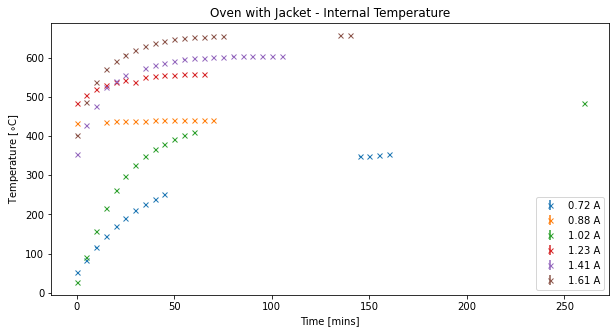

In [10]:
internal_temp__fig = PlotData(result720mA, result880mA, result1020mA, result1230mA, result1410mA, result1610mA,
                    x = "time", y = "temp_int", err = "temp_error", title = "Oven with Jacket - Internal Temperature", 
                    xlabel = "Time [mins]", ylabel = "Temperature [${\circ}$C]",
                    label1 = "0.72 A", label2 = "0.88 A", label3 = "1.02 A", label4 = "1.23 A", label5 = "1.41 A",
                   label6 = "1.61 A")

Plot the front of the oven results

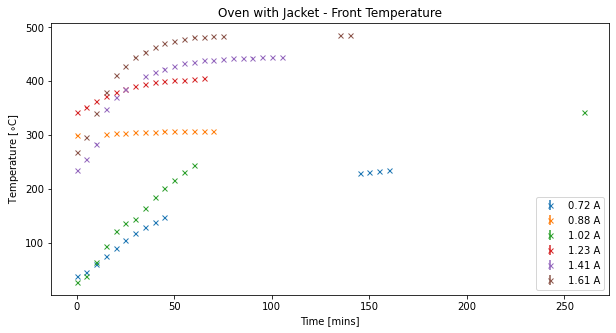

In [11]:
front_temp__fig = PlotData(result720mA, result880mA, result1020mA, result1230mA, result1410mA, result1610mA,
                    x = "time", y = "temp_front", err = "temp_error", title = "Oven with Jacket - Front Temperature", 
                    xlabel = "Time [mins]", ylabel = "Temperature [${\circ}$C]",
                    label1 = "0.72 A", label2 = "0.88 A", label3 = "1.02 A", label4 = "1.23 A", label5 = "1.41 A",
                   label6 = "1.61 A")

Plot the difference between the internal and front temperatures of the oven

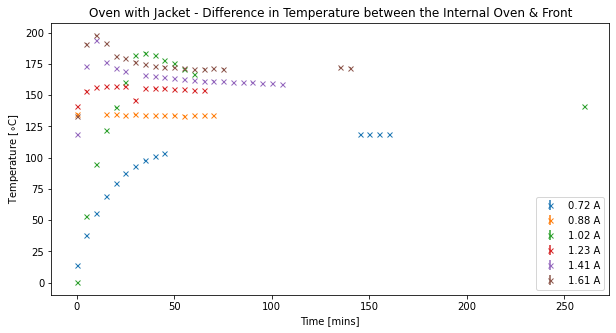

In [12]:
diff_temp_fig = PlotData(result720mA, result880mA, result1020mA, result1230mA, result1410mA, result1610mA,
                    x = "time", y = "temp_diff", err = "temp_error", title = "Oven with Jacket - Difference in Temperature between the Internal Oven & Front", 
                    xlabel = "Time [mins]", ylabel = "Temperature [${\circ}$C]",
                    label1 = "0.72 A", label2 = "0.88 A", label3 = "1.02 A", label4 = "1.23 A", label5 = "1.41 A",
                   label6 = "1.61 A")

Plot the measurment of the external temperature

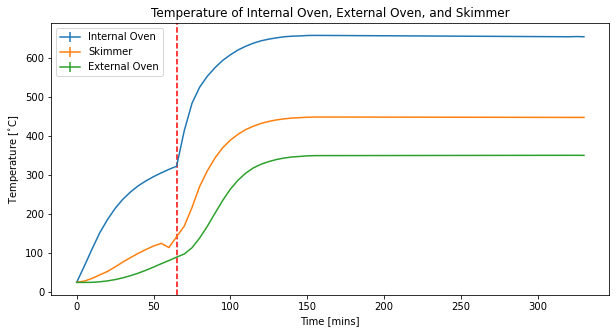

In [13]:
fig_extern_temp = plt.figure()
fig_extern_temp.set_figheight(5)
fig_extern_temp.set_figwidth(10)
axExtern = fig_extern_temp.add_subplot(1,1,1)

plotExtern = lambda ax, x, y, Label: ax.errorbar(x, y, yerr = resultExternal["temp_error"], label = Label, linestyle = "-")
plotExtern(axExtern, resultExternal["time"], resultExternal["temp_int"],  "Internal Oven")
plotExtern(axExtern, resultExternal["time"], resultExternal["temp_front"], "Skimmer")
plotExtern(axExtern, resultExternal["time"], resultExternal["temp_extern"], "External Oven")
axExtern.set_title("Temperature of Internal Oven, External Oven, and Skimmer")
axExtern.set_ylabel("Temperature [$^{\circ}$C]")
axExtern.set_xlabel("Time [mins]")
axExtern.legend()

#Create a vertical dashed line at t=65 mins to show a change in the input current from 0.82 A to 1.62 A
axExtern.axvline(x=65, linestyle = "--", color = "r")
fig_extern_temp.savefig('oven_temp_over_time.svg',dpi=350)

## Define model

## Modelling the data
We can express the difference in temperature between the hotter heating element $T_H$ and the temperature of the oven $T_C$ as 

$\Delta T(t) = T_H(t) - T_C(t)$

where these are both functions of time $t$. By using Fourier's Law

$ \dot{Q} = - \kappa \nabla T$

we can derive an expression for $\Delta T$:

$\Delta T(t)= Ae^{-kt}$

where $A$ and $k$ are constants. Using the expression for $\Delta T$ as above and assuming that $T_H(t)$ at large times is a constant $T_H$ we get the functional form of the oven temperature:

$T_C(t) = T_H - Ae^{-kt}$.

By using the initial condition that $T_c = T_0$ at $t=0$,

$T_C(t=0) = T_0$,

we can find an expression for $A$ and substitute this back into the equation so that now our model is

$T_C(t) = T_H - (T_H-T_0)e^{-kt}$.

We can use this model to perform a fit using the `lmfit` package.

**The issue with the model is that it is only valid at large times** - we have to fit the data when $t$ is large enough.

In [14]:
def TempTimeModel(t, T_H, T_0, k):
    return T_H - (T_H - T_0)*np.exp(-k*t)

## Estimate initial parameters

Now we have to get the initial parameters of our model. Let's define a test function and try to input parameters until we get a reasonable fit.

Let's do this for the 720mA result first.

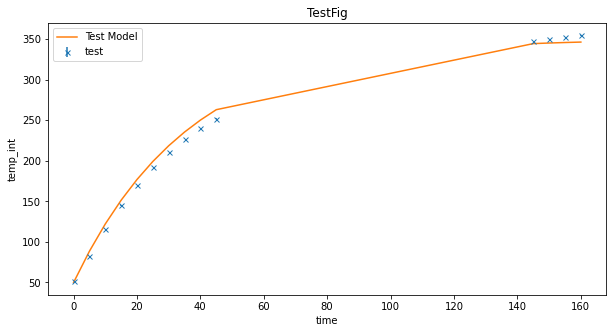

In [15]:
#Make a function to plot data and an estimated model on a graph so that
#model parameters can be adjusted to roughly fit the points so that curve
#fitting can be easier
def EstimateInitParams(df, Xname, Yname, Errname, model):
    test_fig = PlotData(df, title = "TestFig", x= Xname, y = Yname, err = Errname,
                        xlabel = Xname, ylabel = Yname, label = "test")
    test_fig.get_axes()[0].plot(df[Xname], model, label = "Test Model")
    test_fig.get_axes()[0].legend()
    return

EstimateInitParams(result720mA, "time", "temp_int", "temp_error", 
                   TempTimeModel(result720mA["time"], T_H = 350, T_0 = 50, k = 0.0275))

#Store the good initial parameters in a list T_H = list[0], T_0 = list[1], k = list[2]
initParams720mA = [350, 50, 0.0275]  

Estimate initial parameters for 880mA

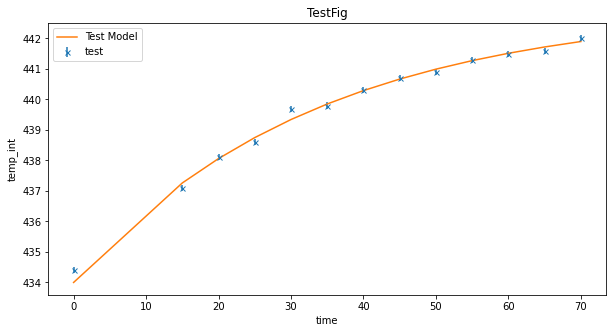

In [16]:
EstimateInitParams(result880mA, "time", "temp_int", "temp_error",
                  TempTimeModel(result880mA["time"], T_H = 443, T_0 = 434, k = 0.03))
initParams880mA = [443, 434, 0.03]

Estimate initial parameters for 1020mA

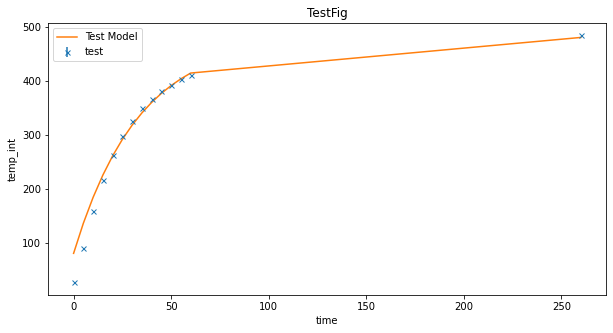

In [17]:
EstimateTempParams = lambda dfin, T_Hin, T_0in, kin: EstimateInitParams(dfin, "time", "temp_int", "temp_error",
                                                      TempTimeModel(dfin["time"], T_H = T_Hin, T_0 = T_0in, k = kin))
EstimateTempParams(result1020mA, 480, 80, 0.03)
initParams1020mA = [480, 80, 0.03]

Estimate initial parameters for 1230mA

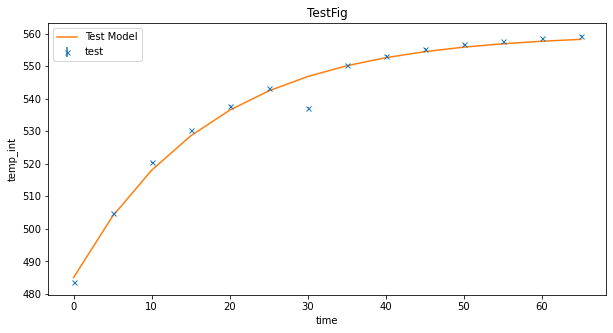

In [18]:
EstimateTempParams(result1230mA, 560, 485, 0.058)
initParams1230mA = [560, 485, 0.058]

Estimate initial parameters for 1410mA

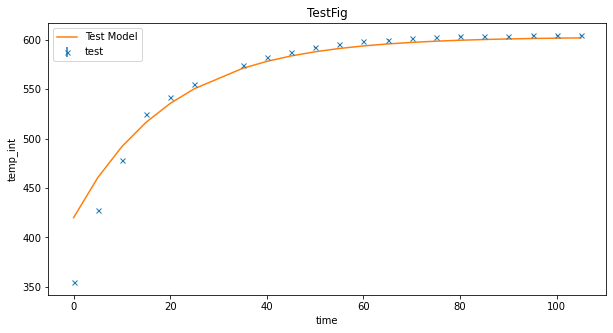

In [19]:
EstimateTempParams(result1410mA, 603, 420, 0.05)
initParams1410mA = [603, 420, 0.05]

Estimate initial parameters for 1610mA

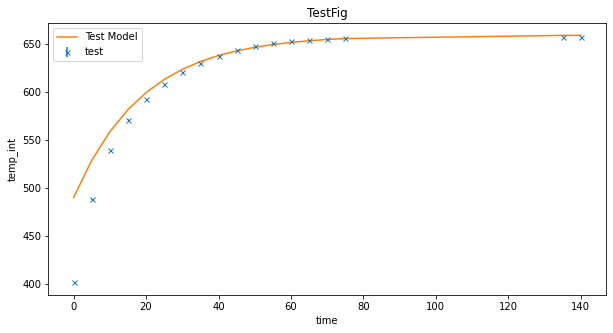

In [20]:
EstimateTempParams(result1610mA, 659, 490, 0.052)
initParams1610mA = [659, 490, 0.052]

## Fit model 

Use `lmfit` package to perform a Marquardt fit.

Start with 720mA.

In [21]:
ModelObj = fit.Model(TempTimeModel)
Params720mA = ModelObj.make_params(T_H = initParams720mA[0], T_0 = initParams720mA[1], k = initParams720mA[2])
time_range = result720mA.iloc[1:,0]
temp_range = result720mA.iloc[1:,1]
err_range = result720mA.iloc[1:,3]
fit720mA = ModelObj.fit(temp_range, Params720mA, t=time_range, weights = err_range)

Fit 880mA

In [22]:
def FitTempModel(df, initparams):
    params = ModelObj.make_params(T_H = initparams[0], T_0= initparams[1], k = initparams[2])
    t_range = df.iloc[1:,0]
    T_range = df.iloc[1:,1]
    error_range = df.iloc[1:,3]
    fit = ModelObj.fit(T_range, params, t=t_range, weights = error_range)
    return fit

fit880mA = FitTempModel(result880mA, initParams880mA)

Fit 1020mA, 1230mA, 1410mA, and 1610mA

In [23]:
fit1020mA = FitTempModel(result1020mA, initParams1020mA)
fit1230mA = FitTempModel(result1230mA, initParams1230mA)
fit1410mA = FitTempModel(result1410mA, initParams1410mA)
fit1610mA = FitTempModel(result1610mA, initParams1610mA)

## Plot model and data

Plot the 720mA data with the model

[[Model]]
    Model(TempTimeModel)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 13
    # variables        = 3
    chi-square         = 0.32199124
    reduced chi-square = 0.03219912
    Akaike info crit   = -42.0763440
    Bayesian info crit = -40.3814959
[[Variables]]
    T_H:  358.720537 +/- 1.14688162 (0.32%) (init = 350)
    T_0:  49.0106404 +/- 1.86218213 (3.80%) (init = 50)
    k:    0.02430507 +/- 3.6019e-04 (1.48%) (init = 0.0275)
[[Correlations]] (unreported correlations are < 0.100)
    C(T_0, k)   = -0.795
    C(T_H, k)   = -0.673
    C(T_H, T_0) = 0.325


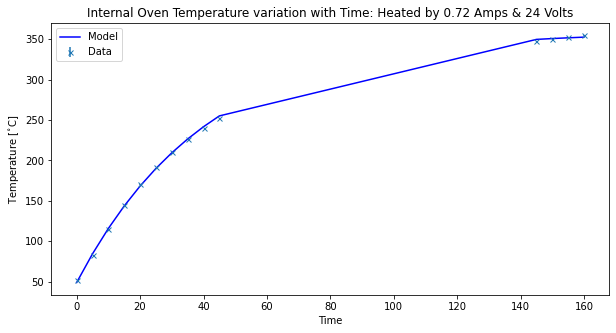

In [24]:
#Function to take in a dataframe, title as a strin, and a fit object and plot the data in the dataframe alonmg with
#it's fitted TempTimeModel
def PlotWithTempModel(df, Title, fit): 
    fig = PlotData(df, title = Title, x="time", y = "temp_int", err = "temp_error",
             xlabel = "Time", ylabel = "Temperature [$^{\circ}$C]", label ="Data")
    
    fig.get_axes()[0].plot(df["time"], 
                           TempTimeModel(df["time"], T_H = fit.best_values["T_H"], T_0 = fit.best_values["T_0"],k = fit.best_values["k"]),
                          color = "blue", label = "Model")
    fig.get_axes()[0].legend()
    return fig

Internal720mA = PlotWithTempModel(result720mA, "Internal Oven Temperature variation with Time: Heated by 0.72 Amps & 24 Volts", fit720mA)
print(fit720mA.fit_report())

Plot 880mA with data and model

[[Model]]
    Model(TempTimeModel)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 12
    # variables        = 3
    chi-square         = 0.00194983
    reduced chi-square = 2.1665e-04
    Akaike info crit   = -98.6990467
    Bayesian info crit = -97.2443267
[[Variables]]
    T_H:  442.711236 +/- 0.31024779 (0.07%) (init = 443)
    T_0:  433.467838 +/- 0.54704701 (0.13%) (init = 434)
    k:    0.03395411 +/- 0.00419407 (12.35%) (init = 0.03)
[[Correlations]] (unreported correlations are < 0.100)
    C(T_H, k)   = -0.961
    C(T_0, k)   = -0.932
    C(T_H, T_0) = 0.820


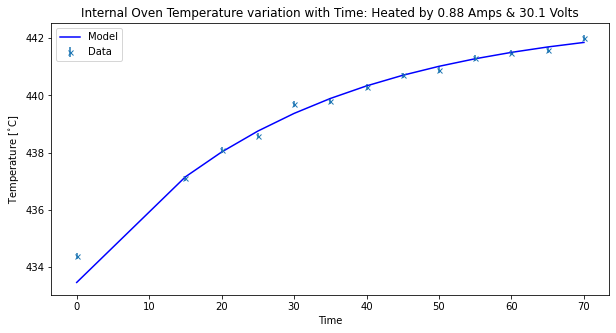

In [25]:
Internal880mA = PlotWithTempModel(result880mA, "Internal Oven Temperature variation with Time: Heated by 0.88 Amps & 30.1 Volts", fit880mA)
print(fit880mA.fit_report())

Plot 1020mA with data and model

[[Model]]
    Model(TempTimeModel)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 13
    # variables        = 3
    chi-square         = 5.71039609
    reduced chi-square = 0.57103961
    Akaike info crit   = -4.69459259
    Bayesian info crit = -2.99974452
[[Variables]]
    T_H:  472.566000 +/- 6.69593841 (1.42%) (init = 480)
    T_0:  24.2970897 +/- 9.00366777 (37.06%) (init = 80)
    k:    0.03603575 +/- 0.00169962 (4.72%) (init = 0.03)
[[Correlations]] (unreported correlations are < 0.100)
    C(T_H, k)   = -0.833
    C(T_0, k)   = -0.729
    C(T_H, T_0) = 0.387


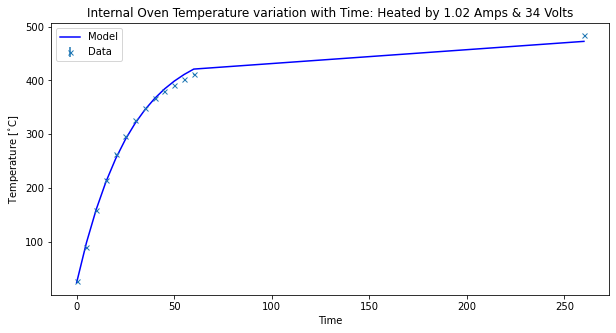

In [26]:
Internal1020mA = PlotWithTempModel(result1020mA, "Internal Oven Temperature variation with Time: Heated by 1.02 Amps & 34 Volts", fit1020mA)
print(fit1020mA.fit_report())

## 1230mA

[[Model]]
    Model(TempTimeModel)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 13
    # variables        = 3
    chi-square         = 0.97010548
    reduced chi-square = 0.09701055
    Akaike info crit   = -27.7388977
    Bayesian info crit = -26.0440497
[[Variables]]
    T_H:  562.017223 +/- 2.91663639 (0.52%) (init = 560)
    T_0:  491.042055 +/- 5.12916399 (1.04%) (init = 485)
    k:    0.04997439 +/- 0.00815380 (16.32%) (init = 0.058)
[[Correlations]] (unreported correlations are < 0.100)
    C(T_H, k)   = -0.891
    C(T_0, k)   = -0.816
    C(T_H, T_0) = 0.587


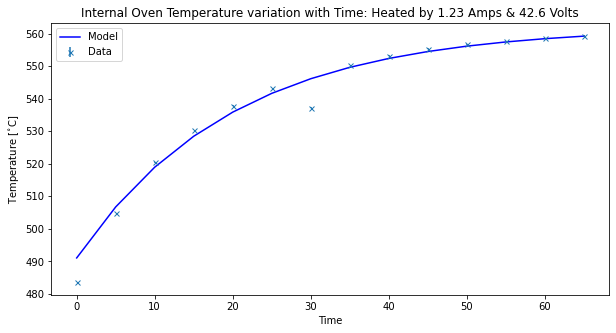

In [27]:
Internal1230mA = PlotWithTempModel(result1230mA, "Internal Oven Temperature variation with Time: Heated by 1.23 Amps & 42.6 Volts", fit1230mA)
print(fit1230mA.fit_report())

## 1410mA

[[Model]]
    Model(TempTimeModel)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 20
    # variables        = 3
    chi-square         = 2.09012930
    reduced chi-square = 0.12294878
    Akaike info crit   = -39.1701269
    Bayesian info crit = -36.1829300
[[Variables]]
    T_H:  603.402247 +/- 1.16932764 (0.19%) (init = 603)
    T_0:  363.111077 +/- 6.42033054 (1.77%) (init = 420)
    k:    0.06644729 +/- 0.00260481 (3.92%) (init = 0.05)
[[Correlations]] (unreported correlations are < 0.100)
    C(T_0, k)   = -0.824
    C(T_H, k)   = -0.615
    C(T_H, T_0) = 0.359


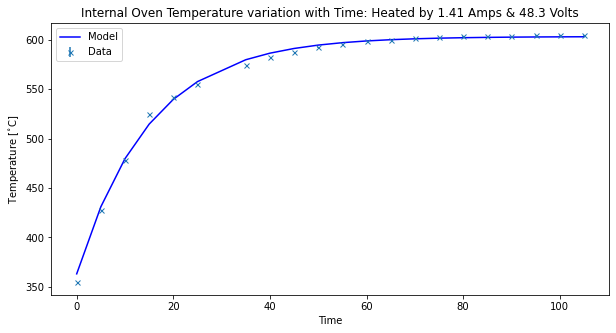

In [28]:
Internal1410mA = PlotWithTempModel(result1410mA, "Internal Oven Temperature variation with Time: Heated by 1.41 Amps & 48.3 Volts", fit1410mA)
print(fit1410mA.fit_report())

## 1610mA

[[Model]]
    Model(TempTimeModel)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 17
    # variables        = 3
    chi-square         = 0.40636990
    reduced chi-square = 0.02902642
    Akaike info crit   = -57.4729814
    Bayesian info crit = -54.9733414
[[Variables]]
    T_H:  657.250029 +/- 0.73539676 (0.11%) (init = 659)
    T_0:  429.513207 +/- 2.95754798 (0.69%) (init = 490)
    k:    0.06285758 +/- 0.00126718 (2.02%) (init = 0.052)
[[Correlations]] (unreported correlations are < 0.100)
    C(T_0, k)   = -0.808
    C(T_H, k)   = -0.706
    C(T_H, T_0) = 0.402


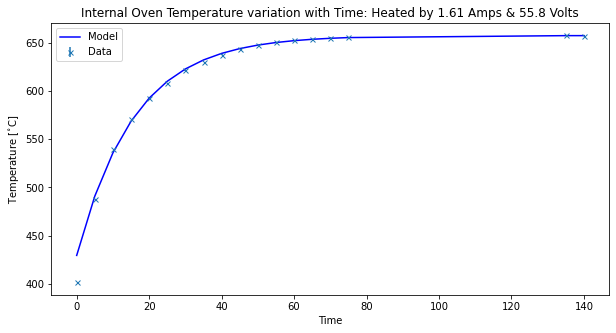

In [29]:
Internal1610mA = PlotWithTempModel(result1610mA, "Internal Oven Temperature variation with Time: Heated by 1.61 Amps & 55.8 Volts", fit1610mA)
print(fit1610mA.fit_report())

# The Power-Temperature Curve

Now, we have final temperatures reached (i.e. temperature which system reaches thermal equilibrium) and their respective input power.

Plot current vs. final temperature, power vs. final temperature, and voltage vs. final temperature.
Perform linear fits for each and plot graphs

## Make dataframe

In [30]:
oven_properties_dict = {"current": [0.60, 0.88, 1.02, 1.23, 0.72, 1.41, 1.61],
                  "voltage": [20, 30.1, 34, 42.6, 24, 48.3, 55.6],
                  "temp_final": [311, fit880mA.best_values["T_H"], fit1020mA.best_values["T_H"], fit1230mA.best_values["T_H"], fit720mA.best_values["T_H"], fit1410mA.best_values["T_H"], fit1610mA.best_values["T_H"]],
                        "temp_final_err": [5, fit880mA.params["T_H"].stderr, fit1020mA.params["T_H"].stderr, fit1230mA.params["T_H"].stderr, fit720mA.params["T_H"].stderr, fit1410mA.params["T_H"].stderr, fit1610mA.params["T_H"].stderr],
                       "k": [None, fit880mA.best_values["k"], fit1020mA.best_values["k"], fit1230mA.best_values["k"], fit720mA.best_values["k"], fit1410mA.best_values["k"], fit1610mA.best_values["k"]],
                       "k_err": [None, fit880mA.params["k"].stderr, fit1020mA.params["k"].stderr, fit1230mA.params["k"].stderr, fit720mA.params["k"].stderr, fit1410mA.params["k"].stderr, fit1610mA.params["k"].stderr]}

oven_properties = pd.DataFrame(oven_properties_dict)

#Add power by multiplying current and voltage together:
oven_properties["power"] = oven_properties["current"]*oven_properties["voltage"]

#Add errors on current and voltage
oven_properties["current_err"] = 0.01
oven_properties["voltage_err"] = 0.1

Make a column for the error for power:

$\sigma_P = P\sqrt{(\frac{\sigma_I}{I})^2 + (\frac{\sigma_V}{V})^2}$

In [31]:
oven_properties["power_err"] = oven_properties["power"]*np.sqrt(np.square(oven_properties["current_err"]/oven_properties["current"]))                                            

Add two columns for the time constant

$\tau = k^{-1}$

and the error on this time constant

$\sigma_{\tau} = k^{-2}\sigma_{k}$ 

In [32]:
#Add the tau column
oven_properties["tau"] = 1/oven_properties["k"]
oven_properties.head()

#Add the tau_err column
oven_properties["tau_err"] = np.power(oven_properties["k"], -2)*oven_properties["k_err"]
oven_properties

current  voltage  temp_final  temp_final_err         k     k_err   power  \
0     0.60     20.0  311.000000        5.000000       NaN       NaN  12.000   
1     0.88     30.1  442.711236        0.310248  0.033954  0.004194  26.488   
2     1.02     34.0  472.566000        6.695938  0.036036  0.001700  34.680   
3     1.23     42.6  562.017223        2.916636  0.049974  0.008154  52.398   
4     0.72     24.0  358.720537        1.146882  0.024305  0.000360  17.280   
5     1.41     48.3  603.402247        1.169328  0.066447  0.002605  68.103   
6     1.61     55.6  657.250029        0.735397  0.062858  0.001267  89.516   

   current_err  voltage_err  power_err        tau   tau_err  
0         0.01          0.1      0.200        NaN       NaN  
1         0.01          0.1      0.301  29.451514  3.637905  
2         0.01          0.1      0.340  27.750223  1.308831  
3         0.01          0.1      0.426  20.010251  3.264863  
4         0.01          0.1      0.240  41.143676  0.609737  
5         0.01          0.1      0.483  15.049524  0.589959  
6         0.01          0.1      0.556  15.908980  0.320718

## Perform linear fits for datasets

Define linear function

$y = mx + c$

In [33]:
def LinearModel(x, m, c):
    return m*x + c

## Estimate initial parameters 
for current vs. temp_final, voltage vs. temp_final, and power vs. temp_final, current vs. k, power vs. k

Start with current vs. temp_final:

In [34]:
EstimateInitParams(oven_properties, "current", "temp_final", "temp_final_err", 
                   LinearModel(oven_properties["current"], 450, 25))
initParamsCurrentVsTemp = [450, 25]

Estimate initial parameters for voltage vs. final temperature

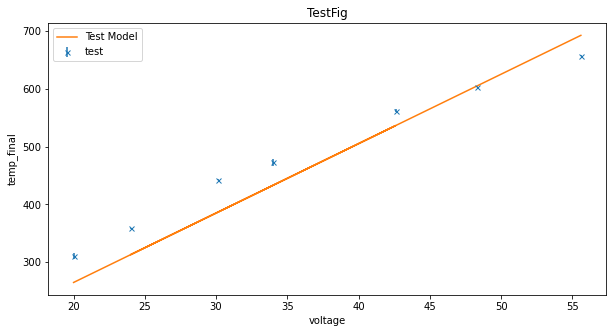

In [35]:
EstimateInitParams(oven_properties, "voltage", "temp_final", "temp_final_err", 
                   LinearModel(oven_properties["voltage"], 12, 25))
initParamsVoltageVsTemp = [12, 25]

Estimate initial parameters for power vs. final temperature

In [36]:
EstimateInitParams(oven_properties, "power", "temp_final", "temp_final_err", 
                   LinearModel(oven_properties["power"], 8, 25))
initParamsPowervsTemp = [8, 25]

Estimate initial parameters for current vs. k

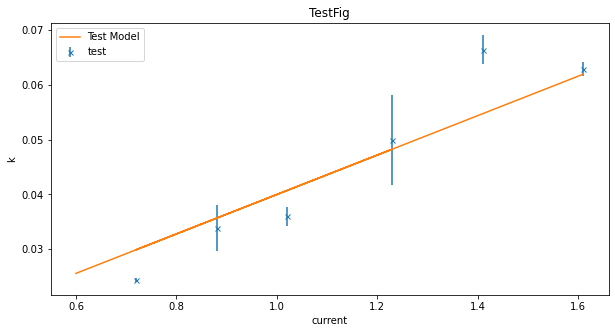

In [37]:
EstimateInitParams(oven_properties, "current", "k", "k_err", 
                   LinearModel(oven_properties["current"], 0.036, 0.004))
initParamsCurrentVsk = [0.036, 0.004]

Estimate initial parameters for power vs. k

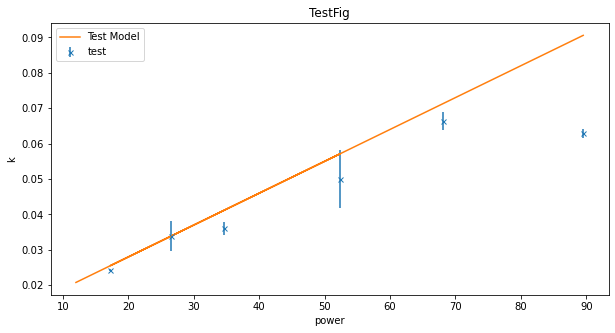

In [38]:
EstimateInitParams(oven_properties, "power", "k", "k_err", 
                   LinearModel(oven_properties["power"], 0.0009, 0.01))
initParamsPowerVsk = [0.0009, 0.01]

## Fit Linear Models

Since we have a significant error on our independent variable and dependent variable we must use `scipy.odr` library to perform orthogonal distance regression.

Start with current versus temperature:

In [39]:
#Have to define model in ODR with an array of parameters so must re-define linear function
def Linear(B, x):
    return B[0]*x+B[1]  #In this case gradient is A[0] and intercept is A[1]

LinearODR = odr.Model(Linear)  #Define the model

#Read in data to odr with known errors
dataCurrentTemp = odr.RealData(x = oven_properties["current"], y = oven_properties["temp_final"], 
                              sx = oven_properties["current_err"], sy = oven_properties["temp_final_err"])

#Make an ODR object then run the ODR object to obtain a fit
odrCurrentTemp = odr.ODR(dataCurrentTemp, LinearODR, initParamsCurrentVsTemp)
fitCurrentTemp = odrCurrentTemp.run()

Fit voltage vs. final temperature

In [40]:
#Read in data
dataVoltageTemp = odr.RealData(x = oven_properties["voltage"], y = oven_properties["temp_final"],
                              sx = oven_properties["voltage_err"], sy = oven_properties["temp_final_err"])
#Make ODR object and perform fit
odrVoltageTemp = odr.ODR(dataVoltageTemp, LinearODR, initParamsVoltageVsTemp)
fitVoltageTemp = odrVoltageTemp.run()

Fit power vs. final temperature

In [41]:
#Read in data
dataPowerTemp = odr.RealData(x = oven_properties["power"], y = oven_properties["temp_final"],
                            sx = oven_properties["power_err"], sy = oven_properties["temp_final_err"])
#Make ODR object anfd perform fit
odrPowerTemp = odr.ODR(dataPowerTemp, LinearODR, initParamsPowervsTemp)
fitPowerTemp = odrPowerTemp.run()

Fit current vs. k

In [42]:
#Get data range to fit over
k_range =oven_properties.iloc[1:, 4].copy()
k_err_range = oven_properties.iloc[1:, 5].copy()
current_range = oven_properties.iloc[1:, 0].copy()
current_err_range = oven_properties.iloc[1:, 7].copy()

#Read in data
dataCurrentk = odr.RealData(x = current_range, y = k_range,
                            sx = current_err_range, sy = k_err_range)
#Make ODR object and perform fit
odrCurrentk = odr.ODR(dataCurrentk, LinearODR, initParamsCurrentVsk)
fitCurrentk = odrCurrentk.run()

Fit power vs. k

In [43]:
#Get data range to fit over
power_range = oven_properties.iloc[1:, 6].copy()
power_err_range = oven_properties.iloc[1:, 9].copy()

#Read in data
dataPowerk = odr.RealData(x = power_range, y = k_range,
                         sx = power_err_range, sy = k_err_range)
#Make ODR object and perform fit
odrPowerk = odr.ODR(dataPowerk, LinearODR, initParamsPowerVsk)
fitPowerk = odrPowerk.run()

## Plot data and linear fits

Also calculate the reduced chi-squared for each linear fit. First caculate the variance

$\sigma^2 = \frac{\sum_{i=1}^{n}(y_i-Y(x_i))^2}{n}$

where $n$ is the number of independent measurements taken (i.e. number of data points), $i$ is the $i$th measurment taken, $y_i$ is the dependent variable, and $x_i$ is the dependent variable, and $Y(x_i)$ is the expected model value of the dependent variable.

The $\chi^2$ is 

$\chi^2 = \frac{\sum_{i=1}^{n}(y_i-Y(x_i))^2}{\sigma^2}$

The reduced chi-squared is 

$\chi^2_{red} = \frac{\chi^2}{N_{dof}}$

where $N_{dof}$ is the number of degrees of freedom. This is the number of independednt measurements - the number of constraints to fit.

Plot CurrentvsTemp and linear fit

In [44]:
#Plot the data
figCurrentTemp = PlotData(oven_properties, title = "Internal Oven Equilibrium Temperature Reached", x="current", y = "temp_final", err = "temp_final_err",
             xlabel = "Current [A]", ylabel = "Temperature [$^{\circ}$C]", label ="Data")

#Plot the fitted model
figCurrentTemp.get_axes()[0].plot(oven_properties["current"], 
                                  Linear(fitCurrentTemp.beta, oven_properties["current"]),
                           color = "blue", label = "Model")
figCurrentTemp.get_axes()[0].legend()
fitCurrentTemp.pprint()
figCurrentTemp.savefig('oven_equilibrium_temp.svg',dpi=350)

#Calculate the chi-squared value by defining a chi-squared function to take in y_i and Y(x_i) to compute varaince 
#and thus the chisquare value
def chi_squared(y, ymodel):
    #Compute variance
    varsum = 0
    for Y, Ymodel in zip(y, ymodel):
        varsum = np.square(Y - Ymodel)
    var = varsum/len(y)
    #Compute chi-squared
    chisquare = 0
    for Y, Ymodel in zip(y, ymodel):
        chisquare += np.square(Y-Ymodel)/var
    print("Chi-squared is", chisquare)
    return chisquare

chisquareCurrentTemp = chi_squared(oven_properties["temp_final"], Linear(fitCurrentTemp.beta, oven_properties["current"]))
print("Reduced chi-squared is", chisquareCurrentTemp/5)

Beta: [337.65998352 127.28616119]
Beta Std Error: [18.27517872 21.46170898]
Beta Covariance: [[ 19.8370105  -22.26696522]
 [-22.26696522  27.35782459]]
Residual Variance: 16.836314990356275
Inverse Condition #: 0.013477022973553444
Reason(s) for Halting:
  Sum of squares convergence
Chi-squared is 52.13829593644538
Reduced chi-squared is 10.427659187289077


Plot VoltagevsTemp and linear fit.

Define a function to make this easier.

Beta: [  9.12889033 157.54392078]
Beta Std Error: [ 0.42196168 17.20492716]
Beta Covariance: [[ 2.33795370e-03 -9.09862467e-02]
 [-9.09862467e-02  3.88683013e+00]]
Residual Variance: 76.15705060716066
Inverse Condition #: 0.007199944292134703
Reason(s) for Halting:
  Sum of squares convergence
Chi-squared is 184.39081403118723
Reduced chi-squared is 36.87816280623745


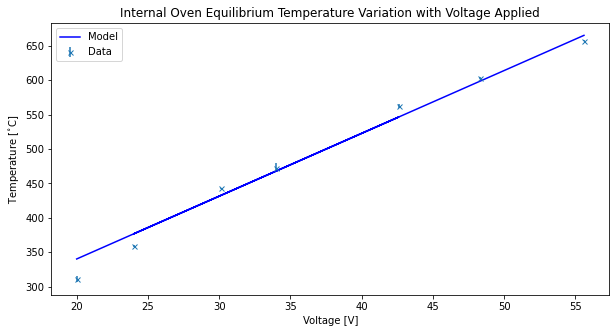

In [45]:
#Define a function to plot the oven linear models and data
def PlotLinearFit(df, Title, X, Y, Err, Xlabel, Ylabel, odrfit): 
    fig = PlotData(df, title = Title, x = X, y = Y, err = Err, xlabel = Xlabel, ylabel = Ylabel, label = "Data")  #Plot the data
    fig.get_axes()[0].plot(df[X], Linear(odrfit.beta, df[X]), color = "blue", label = "Model")  #Plot the model
    #Set the legend
    fig.get_axes()[0].legend()
    #Print the results of the fit
    odrfit.pprint()
    return

#Plot VoltagevsTemp
PlotLinearFit(oven_properties, Title = "Internal Oven Equilibrium Temperature Variation with Voltage Applied", 
             X = "voltage", Y = "temp_final", Err = "temp_final_err", Xlabel = "Voltage [V]", Ylabel = "Temperature [$^{\circ}$C]",
             odrfit = fitVoltageTemp)

#Calculate chisquared value
chisquareVoltageTemp = chi_squared(y=oven_properties["temp_final"], ymodel = Linear(fitVoltageTemp.beta, oven_properties["voltage"]))
print("Reduced chi-squared is", chisquareVoltageTemp/5)

Plot PowervsTemp and linear fit

In [46]:
#Plot Power vs Temperature
PlotLinearFit(oven_properties, Title = "Internal Oven Equilibrium Temperature Variation with Power Applied", 
             X = "power", Y = "temp_final", Err = "temp_final_err", Xlabel = "Power [Watts]", Ylabel = "Temperature [$^{\circ}$C]",
             odrfit = fitPowerTemp)

#Calculate and print reduced chi-squared
chisquarePowerTemp = chi_squared(oven_properties["temp_final"], Linear(fitPowerTemp.beta, oven_properties["power"]))
print("Reduced chi-squared is", chisquarePowerTemp/5)

Beta: [  4.29929764 306.28728515]
Beta Std Error: [ 0.46604015 20.56094271]
Beta Covariance: [[ 1.28585234e-03 -4.83807198e-02]
 [-4.83807198e-02  2.50282497e+00]]
Residual Variance: 168.91007976275523
Inverse Condition #: 0.011744932256453147
Reason(s) for Halting:
  Sum of squares convergence
Chi-squared is 33.96398722734878
Reduced chi-squared is 6.792797445469756


Plot Currentvsk and linear fit

In [47]:
#Plot Current vs. k
PlotLinearFit(oven_properties, Title = "Internal Oven k Variation with Current Applied", 
             X = "current", Y = "k", Err = "k_err", Xlabel = "Current [Amps]", Ylabel = "k [s$^{-1}$]",
             odrfit = fitCurrentk)

#Calculate and print reduced chi-squared
chisqaureCurrentk = chi_squared(k_range, current_range)
print("Reduced chi-squared is", chisqaureCurrentk/4)

Beta: [ 0.04544209 -0.00839944]
Beta Std Error: [0.00348765 0.00330582]
Beta Covariance: [[ 2.40918821e-06 -2.14984249e-06]
 [-2.14984249e-06  2.16452756e-06]]
Residual Variance: 5.048881330371354
Inverse Condition #: 0.1583797297078505
Reason(s) for Halting:
  Sum of squares convergence
Chi-squared is 19.449499723098604
Reduced chi-squared is 4.862374930774651


Plot Powervsk and linear fit

In [48]:
#Plot power vs. k
PlotLinearFit(oven_properties, Title = "Internal Oven k Variation with Power Applied", 
             X = "power", Y = "k", Err = "k_err", Xlabel = "Power [Watts]", Ylabel = "k [s$^{-1}$]",
             odrfit = fitPowerk)

#Calculate and print reduced chi-squared
chisqaurePowerk = chi_squared(k_range, power_range)
print("Reduced chi-squared is", chisqaurePowerk/4)

Beta: [0.00056809 0.01467182]
Beta Std Error: [5.02991970e-05 1.58655679e-03]
Beta Covariance: [[ 3.18381198e-10 -7.77729356e-09]
 [-7.77729356e-09  3.16764535e-07]]
Residual Variance: 7.946478096807394
Inverse Condition #: 0.1996286181672022
Reason(s) for Halting:
  Sum of squares convergence
Chi-squared is 13.17362900319059
Reduced chi-squared is 3.2934072507976473
